In [1]:
# get all essential libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
houses = pd.read_csv("/content/kc_house_data.csv")
# get the data 

In [3]:
houses

id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]

In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
houses.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.400881e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.671272e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

In [6]:
# check the NAN value 
houses.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

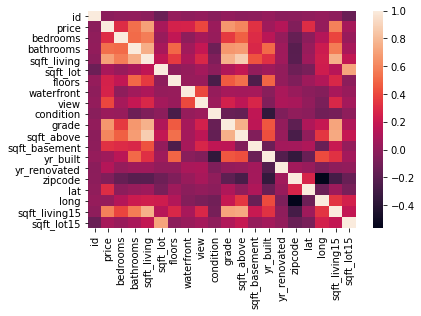

In [7]:
# plotting heat map for all the fector or column 
corr = houses.corr()
sns.heatmap(corr)

In [8]:
# create x and y 
feature_cols = ['sqft_living','grade','sqft_above','sqft_living15']
x = houses[feature_cols] # predictor
y = houses.price # response

In [9]:
 x.head()

sqft_living  grade  sqft_above  sqft_living15
0         1180      7        1180           1340
1         2570      7        2170           1690
2          770      6         770           2720
3         1960      7        1050           1360
4         1680      8        1680           1800

In [10]:
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [13]:
# Dividing data in training and testing datasets
from sklearn.model_selection import train_test_split
# print(train_test_split.__doc__)
x_trian , x_test , y_train ,y_test = train_test_split(x,y,train_size = 0.8 , random_state = 100)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4323, 4)
(4323, 4)
(17290,)
(4323,)


In [18]:
# instantiate fit 
linreg = LinearRegression()
linreg.fit(x_train,y_train)

In [ ]:
# Predict 
# Linreg.predict(np.array([[1000,5,1000,1000,2,1]]))

In [ ]:
# Mean Square error
mse = mean_squared_error(y_tedt,linreg.predict(x_test))
print(mse)
print(np.sqrt(mse))

In [ ]:
# Score 
print(linreg.score(x_test,y_test))

In [ ]:
# Cross validation score 
scores = cross_val_score(linreg,x,y,cv = 10)
scores

In [ ]:
# look at the residual plot 
y_pred = linreg.predict(x_test)